In [4]:
#PIP INSTALLATION
print('---1---')
%pip install pandas
print('---2---')
%pip install seaborn
print('---3---')
%pip install scikit-learn
print('---4---')
%pip install catboost
print('---5---')
%pip install ipywidgets
print('---6---')
%pip install pandas openpyxl
print('---7---')
%pip install bayesian-optimization


---1---
Note: you may need to restart the kernel to use updated packages.
---2---



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
---3---



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in d:\optimizing-catboost-model-with-bayesian\env\lib\site-packages (1.6.1)

---4---



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
---5---



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
---6---



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
---7---



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip list

Package               Version
--------------------- -----------
aiohappyeyeballs      2.4.6
aiohttp               3.11.12
aiosignal             1.3.2
asttokens             3.0.0
attrs                 25.1.0
bayesian-optimization 2.0.3
blinker               1.9.0
catboost              1.2.7
category_encoders     2.8.0
certifi               2025.1.31
charset-normalizer    3.4.1
click                 8.1.7
colorama              0.4.6
comm                  0.2.2
contourpy             1.3.1
cycler                0.12.1
datasets              3.2.0
debugpy               1.8.12
decorator             5.1.1
dill                  0.3.8
et_xmlfile            2.0.0
executing             2.1.0
filelock              3.17.0
Flask                 3.1.0
Flask-SQLAlchemy      3.1.1
fonttools             4.55.3
frozenlist            1.5.0
fsspec                2024.9.0
graphviz              0.20.3
greenlet              3.1.1
huggingface-hub       0.28.1
idna                  3.10
ipykernel             6.2

In [6]:
#FROM LIBRARIES
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier, Pool
from IPython.display import FileLink
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,
    confusion_matrix
)
from typing import Optional


#IMPORT AS
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [7]:
file_path = 'Dataset/diabetic_data.csv'
df = pd.read_csv(file_path,keep_default_na=False)
df_clean = df.copy()
df_clean.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
df_clean.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
print(list(df_clean))

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


Data Cleaning 

In [10]:
#REMOVING DUPLICATE DATA'S
df_clean['patient_nbr'].value_counts()
df_clean = df_clean.drop_duplicates(subset=['patient_nbr'])

There are 30,248 total of Duplicate Data's which the unique data consist only 71,518

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71518 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications           

In [12]:
print(df_clean['metformin'].value_counts())
print("-----------------------------")
print(df_clean['repaglinide'].value_counts())
print("-----------------------------")
print(df_clean['nateglinide'].value_counts())
print("-----------------------------")
print(df_clean['chlorpropamide'].value_counts())

metformin
No        56527
Steady    13718
Up          838
Down        435
Name: count, dtype: int64
-----------------------------
repaglinide
No        70592
Steady      824
Up           73
Down         29
Name: count, dtype: int64
-----------------------------
nateglinide
No        71020
Steady      474
Up           16
Down          8
Name: count, dtype: int64
-----------------------------
chlorpropamide
No        71446
Steady       67
Up            4
Down          1
Name: count, dtype: int64


In [13]:
print(df_clean['glimepiride'].value_counts())
print("-----------------------------")
print(df_clean['acetohexamide'].value_counts())
print("-----------------------------")
print(df_clean['glipizide'].value_counts())
print("-----------------------------")
print(df_clean['glyburide'].value_counts())


glimepiride
No        67773
Steady     3372
Up          235
Down        138
Name: count, dtype: int64
-----------------------------
acetohexamide
No        71517
Steady        1
Name: count, dtype: int64
-----------------------------
glipizide
No        62412
Steady     8150
Up          578
Down        378
Name: count, dtype: int64
-----------------------------
glyburide
No        63664
Steady     6812
Up          621
Down        421
Name: count, dtype: int64


In [14]:
print(df_clean['tolbutamide'].value_counts())
print("-----------------------------")
print(df_clean['pioglitazone'].value_counts())
print("-----------------------------")
print(df_clean['rosiglitazone'].value_counts())
print("-----------------------------")
print(df_clean['acarbose'].value_counts())

tolbutamide
No        71499
Steady       19
Name: count, dtype: int64
-----------------------------
pioglitazone
No        66210
Steady     5047
Up          180
Down         81
Name: count, dtype: int64
-----------------------------
rosiglitazone
No        66817
Steady     4490
Up          136
Down         75
Name: count, dtype: int64
-----------------------------
acarbose
No        71316
Steady      192
Up           10
Name: count, dtype: int64


In [15]:
print(df_clean['miglitol'].value_counts())
print("-----------------------------")
print(df_clean['troglitazone'].value_counts())
print("-----------------------------")
print(df_clean['tolazamide'].value_counts())
print("-----------------------------")
print(df_clean['examide'].value_counts())

miglitol
No        71498
Steady       18
Down          1
Up            1
Name: count, dtype: int64
-----------------------------
troglitazone
No        71515
Steady        3
Name: count, dtype: int64
-----------------------------
tolazamide
No        71488
Steady       30
Name: count, dtype: int64
-----------------------------
examide
No    71518
Name: count, dtype: int64


In [16]:
print(df_clean['citoglipton'].value_counts())
print("-----------------------------")
print(df_clean['insulin'].value_counts())
print("-----------------------------")
print(df_clean['glyburide-metformin'].value_counts())
print("-----------------------------")
print(df_clean['glipizide-metformin'].value_counts())

citoglipton
No    71518
Name: count, dtype: int64
-----------------------------
insulin
No        34921
Steady    22129
Down       7505
Up         6963
Name: count, dtype: int64
-----------------------------
glyburide-metformin
No        71016
Steady      491
Up            7
Down          4
Name: count, dtype: int64
-----------------------------
glipizide-metformin
No        71511
Steady        7
Name: count, dtype: int64


In [17]:
print(df_clean['glimepiride-pioglitazone'].value_counts())
print("-----------------------------")
print(df_clean['metformin-rosiglitazone'].value_counts())
print("-----------------------------")
print(df_clean['metformin-pioglitazone'].value_counts())

glimepiride-pioglitazone
No    71518
Name: count, dtype: int64
-----------------------------
metformin-rosiglitazone
No        71516
Steady        2
Name: count, dtype: int64
-----------------------------
metformin-pioglitazone
No        71517
Steady        1
Name: count, dtype: int64


In [18]:
(df_clean.medical_specialty.value_counts(normalize=True, dropna=False) * 100)


medical_specialty
?                                   48.207444
InternalMedicine                    15.267485
Family/GeneralPractice               7.156240
Emergency/Trauma                     6.243184
Cardiology                           5.964932
                                      ...    
SportsMedicine                       0.001398
Dermatology                          0.001398
Proctology                           0.001398
Surgery-PlasticwithinHeadandNeck     0.001398
Resident                             0.001398
Name: proportion, Length: 71, dtype: float64

Removing features that is not useful for our target readmittied

encounter_id  > Irrelevant 

Patient_nbr > Irrelevant

Weight > Consist of 97% missing value

Payer_code > Irrelevant

Medicial_Speciality > 48% missing value

Repaglinide	> 71K samples not using the drug

Nateglinide	> 71K samples not using the drug

Chlorpropamide > 71K samples not using the drug

Acarbose > 71k samples not using the drug

Miglitol > 71k samples not using the drug

Troglitazone > Only 3 patients using the drug

Tolazamide > Only 39 patients using the drug

Examide	> All patients not using the drug

Citoglipton	> All patients not using the drug

Glyburide_metformin	> 71k samples not using the drug

Glipizide_metfotmin > Only 13 patients using the drug

Glimepiride_pioglitazone > Only 1 patient using the drug

Metformin_rosiglitazone > Only 2 patients using the drug

Metformin_pioglitazone > Only 1 patient using the drug

Acetohexamide > Only 1 patient using the drug

tolbutamide > Only 23 patients using the drug



In [19]:
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']
df_clean.drop(features_drop_list, axis=1, inplace=True)

ICD 9 codes

In [20]:
#start by setting all values containing E or V into 0 (as one category)
df_clean.loc[df_clean['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df_clean.loc[df_clean['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df_clean.loc[df_clean['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df_clean.loc[df_clean['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df_clean.loc[df_clean['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df_clean.loc[df_clean['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df_clean['diag_1'] = df_clean['diag_1'].replace('?', -1)
df_clean['diag_2'] = df_clean['diag_2'].replace('?', -1)
df_clean['diag_3'] = df_clean['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
df_clean['diag_1'] = df_clean['diag_1'].astype(float)
df_clean['diag_2'] = df_clean['diag_2'].astype(float)
df_clean['diag_3'] = df_clean['diag_3'].astype(float)

In [21]:
# Ensure 'diag_1', 'diag_2', 'diag_3' are numeric
df_clean[['diag_1', 'diag_2', 'diag_3']] = df_clean[['diag_1', 'diag_2', 'diag_3']].apply(pd.to_numeric, errors='coerce')

def categorize_diag(df_clean, col):
    df_clean.loc[(df_clean[col] >= 1) & (df_clean[col] < 140), col] = 1
    df_clean.loc[(df_clean[col] >= 140) & (df_clean[col] < 240), col] = 2
    df_clean.loc[(df_clean[col] >= 240) & (df_clean[col] < 280), col] = 3
    df_clean.loc[(df_clean[col] >= 280) & (df_clean[col] < 290), col] = 4
    df_clean.loc[(df_clean[col] >= 290) & (df_clean[col] < 320), col] = 5
    df_clean.loc[(df_clean[col] >= 320) & (df_clean[col] < 390), col] = 6
    df_clean.loc[(df_clean[col] >= 390) & (df_clean[col] < 460), col] = 7
    df_clean.loc[(df_clean[col] >= 460) & (df_clean[col] < 520), col] = 8
    df_clean.loc[(df_clean[col] >= 520) & (df_clean[col] < 580), col] = 9
    df_clean.loc[(df_clean[col] >= 580) & (df_clean[col] < 630), col] = 10
    df_clean.loc[(df_clean[col] >= 630) & (df_clean[col] < 680), col] = 11
    df_clean.loc[(df_clean[col] >= 680) & (df_clean[col] < 710), col] = 12
    df_clean.loc[(df_clean[col] >= 710) & (df_clean[col] < 740), col] = 13
    df_clean.loc[(df_clean[col] >= 740) & (df_clean[col] < 760), col] = 14
    df_clean.loc[(df_clean[col] >= 760) & (df_clean[col] < 780), col] = 15
    df_clean.loc[(df_clean[col] >= 780) & (df_clean[col] < 800), col] = 16
    df_clean.loc[(df_clean[col] >= 800) & (df_clean[col] < 1000), col] = 17
    df_clean.loc[df_clean[col] == -1, col] = 0  # Handle missing values
    
# Apply function to diagnosis columns
for col in ['diag_1', 'diag_2', 'diag_3']:
    categorize_diag(df_clean, col)

# Print the result
print(df_clean[['diag_1', 'diag_2', 'diag_3']].head())

   diag_1  diag_2  diag_3
0     3.0     0.0     0.0
1     3.0     3.0     3.0
2    11.0     3.0     0.0
3     1.0     3.0     7.0
4     2.0     2.0     3.0


In [22]:
print(df_clean['diag_2'])

0          0.0
1          3.0
2          3.0
3          3.0
4          2.0
          ... 
101754     9.0
101755    10.0
101756    10.0
101758     1.0
101765     9.0
Name: diag_2, Length: 71518, dtype: float64


In [23]:
#check the results
df_clean.diag_2.unique()

array([ 0.,  3.,  2.,  7.,  8.,  4., 17., 13., 10.,  1.,  9., 12.,  6.,
       16.,  5., 11., 14.])

In [24]:
df_clean['race'] = df_clean['race'].replace('?', 'Other')
df_clean.race.value_counts()

race
Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: count, dtype: int64

In [25]:
df_clean['gender'] = df_clean['gender'].replace('Unknown/Invalid', 'Female')
df_clean.gender.value_counts()

gender
Female    38028
Male      33490
Name: count, dtype: int64

In [26]:
df_clean['gender'] = df_clean['gender'].replace('Male', 1)
df_clean['gender'] = df_clean['gender'].replace('Female', 0)
df_clean.gender.value_counts()

C:\Users\SnowPlay\AppData\Local\Temp\ipykernel_15144\2177177959.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['gender'] = df_clean['gender'].replace('Female', 0)


gender
0    38028
1    33490
Name: count, dtype: int64

In [27]:
age_replacements = {}
for i in range(0, 10):
    age_range = f'[{10*i}-{10*(i+1)})'
    midpoint = i*10 + 5
    age_replacements[age_range] = midpoint

df_clean['age'] = df_clean['age'].replace(age_replacements)

df_clean['age'].value_counts()

C:\Users\SnowPlay\AppData\Local\Temp\ipykernel_15144\856190937.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['age'] = df_clean['age'].replace(age_replacements)


age
75    18210
65    15960
55    12466
85    11589
45     6878
35     2699
95     1900
25     1127
15      535
5       154
Name: count, dtype: int64

In [28]:
df_clean['age'].value_counts()

age
75    18210
65    15960
55    12466
85    11589
45     6878
35     2699
95     1900
25     1127
15      535
5       154
Name: count, dtype: int64

In [29]:
df_clean['readmitted']=df_clean['readmitted'].replace('NO', 0)
df_clean['readmitted']=df_clean['readmitted'].replace('>30', 1)
df_clean['readmitted']=df_clean['readmitted'].replace('<30', 2)
df_clean.readmitted.value_counts()

C:\Users\SnowPlay\AppData\Local\Temp\ipykernel_15144\3891844975.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['readmitted']=df_clean['readmitted'].replace('<30', 2)


readmitted
0    42985
1    22240
2     6293
Name: count, dtype: int64

In [30]:
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['race'], prefix='race')], axis=1).drop(['race'],axis=1)

race_columns = ['race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other']
df_clean[race_columns] = df_clean[race_columns].astype(int)
# Check the changes
print(df_clean[race_columns].head())

   race_AfricanAmerican  race_Asian  race_Caucasian  race_Hispanic  race_Other
0                     0           0               1              0           0
1                     0           0               1              0           0
2                     1           0               0              0           0
3                     0           0               1              0           0
4                     0           0               1              0           0


-- Algorithm --

In [31]:
X = df_clean.drop('readmitted', axis=1)  # Features
y = df_clean['readmitted']               # Target variable


In [32]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
X[cat_features] = X[cat_features].astype(str)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,  # 20% for testing
    random_state=42,  # for reproducibility
    stratify=y  # ensure balanced split of target classes
)

In [34]:
gpu_available = "NVIDIA_VISIBLE_DEVICES" in os.environ or "CUDA_VISIBLE_DEVICES" in os.environ
task_type = 'GPU' if gpu_available else 'CPU'

class CatBoostMulticlassOptimizer:
    def __init__(self, X_train, y_train, cat_features, eval_metric, n_splits, random_state=42, gpu_id=0):
        self.X_train = X_train
        self.y_train = y_train
        self.cat_features = cat_features
        self.eval_metric = eval_metric
        self.n_splits = n_splits  # Reduced from 5 to 3
        self.random_state = random_state
        self.gpu_id = gpu_id
        self.n_classes = len(np.unique(y_train))
        
        # Validate input data
        self._validate_inputs()
        
    def _validate_inputs(self):
        if not isinstance(self.X_train, pd.DataFrame):
            raise TypeError("X_train must be a pandas DataFrame")
            
        if not all(col in self.X_train.columns for col in self.cat_features):
            raise ValueError("Some categorical features not found in X_train")
            
        if self.eval_metric not in ['f1', 'auc', 'accuracy']:
            raise ValueError("eval_metric must be one of: 'f1', 'auc', 'accuracy'")
            
        if self.n_classes < 2:
            raise ValueError("Number of classes must be at least 2")
    
    def _get_metric_score(self, y_true, y_pred, y_prob=None):
        if self.eval_metric == 'f1':
            return f1_score(y_true, y_pred, average='weighted')
        elif self.eval_metric == 'auc':
            if self.n_classes == 2:
                return roc_auc_score(y_true, y_prob[:, 1])
            else:
                return roc_auc_score(y_true, y_prob, multi_class='ovr')
        else:  # accuracy
            return accuracy_score(y_true, y_pred)
    
    def _get_catboost_params(self, iterations, learning_rate, depth, l2_leaf_reg):
        """Simplified parameters without border_count"""
        params = {
            'iterations': int(iterations),
            'learning_rate': float(learning_rate),
            'depth': int(depth),
            'l2_leaf_reg': float(l2_leaf_reg),
            'random_state': self.random_state,
            'verbose': False,
            'task_type': task_type,
            'devices': f'{self.gpu_id}' if task_type == 'GPU' else None,
            'loss_function': 'MultiClass' if self.n_classes > 2 else 'Logloss',
            'eval_metric': 'MultiClass' if self.n_classes > 2 else 'Logloss',
            'classes_count': self.n_classes if self.n_classes > 2 else None,
            'bootstrap_type': 'Bernoulli',
        }
        return params
        
    def _objective(self, iterations, learning_rate, depth, l2_leaf_reg):
        """Simplified objective function"""
        try:
            params = self._get_catboost_params(iterations, learning_rate, depth, l2_leaf_reg)
            
            skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
            scores = []
            
            for train_idx, val_idx in skf.split(self.X_train, self.y_train):
                X_fold_train = self.X_train.iloc[train_idx]
                y_fold_train = self.y_train[train_idx]
                X_fold_val = self.X_train.iloc[val_idx]
                y_fold_val = self.y_train[val_idx]
                
                train_pool = Pool(
                    data=X_fold_train,
                    label=y_fold_train,
                    cat_features=self.cat_features
                )
                val_pool = Pool(
                    data=X_fold_val,
                    label=y_fold_val,
                    cat_features=self.cat_features
                )
                
                model = CatBoostClassifier(**params)
                model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=20, verbose=False)
                
                y_prob = model.predict_proba(X_fold_val)
                y_pred = np.argmax(y_prob, axis=1)
                
                score = self._get_metric_score(y_fold_val, y_pred, y_prob)
                scores.append(score)

            return np.mean(scores)
            
        except Exception as e:
            print(f"Error in optimization: {str(e)}")
            return 0.0
    
    def optimize(self, n_iter=20, n_init_points=5):
        """Reduced number of iterations and initial points"""
        if n_iter <= n_init_points:
            raise ValueError("n_iter must be greater than n_init_points")
        
        # Simplified parameter bounds
        pbounds = {
            'iterations': (100, 500),  # Reduced range
            'learning_rate': (0.01, 0.3),
            'depth': (4, 8),  # Reduced range
            'l2_leaf_reg': (1.0, 5.0)  # Reduced range
        }
        
        try:
            optimizer = BayesianOptimization(
                f=self._objective,
                pbounds=pbounds,
                random_state=self.random_state
            )
            
            optimizer.maximize(
                init_points=n_init_points,
                n_iter=n_iter
            )
            
            print("\nBest parameters found:")
            best_params = optimizer.max['params']
            for param, value in best_params.items():
                if param in ['depth', 'iterations']:
                    print(f"{param}: {int(value)}")
                else:
                    print(f"{param}: {value:.4f}")
            print(f"\nBest CV {self.eval_metric} score: {optimizer.max['target']:.4f}")
        
            return best_params
            
        except Exception as e:
            print(f"Optimization failed: {str(e)}")
            # Return default parameters if optimization fails
            return {
                'iterations': 300,
                'learning_rate': 0.1,
                'depth': 6,
                'l2_leaf_reg': 3.0
            }
    
    def train_final_model(self, best_params, test_size=0.2):
            """Train final model with memory-efficient settings"""
            X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(
                self.X_train, self.y_train, test_size=test_size, 
                random_state=self.random_state, stratify=self.y_train
            )
            
            train_pool = Pool(
                data=X_train_final,
                label=y_train_final,
                cat_features=self.cat_features
            )
            val_pool = Pool(
                data=X_val_final,
                label=y_val_final,
                cat_features=self.cat_features
            )

            final_params = self._get_catboost_params(
                best_params['iterations'],
                best_params['learning_rate'],
                best_params['depth'],
                best_params['l2_leaf_reg']
            )
            
            final_params.update({
                'verbose': 100,
                'use_best_model': True
            })

            final_model = CatBoostClassifier(**final_params)
            try:
                final_model.fit(
                    train_pool,
                    eval_set=val_pool,
                    early_stopping_rounds=20,
                    verbose=50
                )
            except KeyboardInterrupt:
                print("Training interrupted by user.")
                return final_model
            
            y_val_pred = final_model.predict(X_val_final)
            y_val_prob = final_model.predict_proba(X_val_final)
            final_score = self._get_metric_score(y_val_final, y_val_pred, y_val_prob)
            print(f"\nFinal validation {self.eval_metric} score: {final_score:.4f}")
            
            return final_model

In [35]:
class ModelEvaluator:
    def __init__(self, model, X_train: pd.DataFrame, y_train: np.ndarray, 
                 X_test: pd.DataFrame, y_test: np.ndarray, cat_features: list):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.cat_features = cat_features
        self.y_pred = model.predict(X_test)
        self.y_pred_proba = model.predict_proba(X_test)
        self.n_classes = len(np.unique(y_train))
        
    def plot_learning_curves(self, figsize: tuple = (12, 5)):
        """Plot training and validation learning curves."""
        plt.figure(figsize=figsize)
        
        # Get learning curves from model
        train_loss = self.model.get_evals_result()['learn']['MultiClass']
        if 'validation' in self.model.get_evals_result():
            val_loss = self.model.get_evals_result()['validation']['MultiClass']
        
        plt.plot(train_loss, label='Training Loss')
        if 'validation' in self.model.get_evals_result():
            plt.plot(val_loss, label='Validation Loss')
            
        plt.title('Learning Curves')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def plot_feature_importance(self, top_n: Optional[int] = 20, figsize: tuple = (10, 6)):
        """Plot feature importance."""
        importance = pd.DataFrame({
            'Feature': self.X_train.columns,
            'Importance': self.model.get_feature_importance()
        }).sort_values('Importance', ascending=False)
        
        if top_n:
            importance = importance.head(top_n)
            
        plt.figure(figsize=figsize)
        sns.barplot(data=importance, x='Importance', y='Feature')
        plt.title(f'Top {top_n} Feature Importance' if top_n else 'Feature Importance')
        plt.show()
        
    def plot_roc_curve(self, figsize: tuple = (8, 6)):
        """Plot ROC curve for multiclass classification."""
        plt.figure(figsize=figsize)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        for i in range(self.n_classes):
            fpr[i], tpr[i], _ = roc_curve(
                (self.y_test == i).astype(int), 
                self.y_pred_proba[:, i]
            )
            roc_auc[i] = roc_auc_score(fpr[i], tpr[i])
            plt.plot(
                fpr[i], 
                tpr[i], 
                label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})'
            )
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Multiclass ROC Curves')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()
        
    def plot_precision_recall_curve(self, figsize: tuple = (8, 6)):
        """Plot Precision-Recall curve for multiclass classification."""
        plt.figure(figsize=figsize)
        
        # Compute Precision-Recall curve for each class
        for i in range(self.n_classes):
            precision, recall, _ = precision_recall_curve(
                (self.y_test == i).astype(int),
                self.y_pred_proba[:, i]
            )
            ap = average_precision_score(
                (self.y_test == i).astype(int),
                self.y_pred_proba[:, i]
            )
            plt.plot(recall, precision, label=f'Class {i} (AP = {ap:.2f})')
            
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Multiclass Precision-Recall Curves')
        plt.legend(loc="lower left")
        plt.grid(True)
        plt.show()
        
    def plot_confusion_matrix(self, figsize: tuple = (8, 6)):
        """Plot confusion matrix."""
        cm = confusion_matrix(self.y_test, self.y_pred)
        
        plt.figure(figsize=figsize)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
    def get_metrics(self) -> dict:
        """Calculate and return various performance metrics for multiclass classification."""
        metrics = {
            'Accuracy': accuracy_score(self.y_test, self.y_pred),
            'Macro Precision': precision_score(self.y_test, self.y_pred, average='macro'),
            'Weighted Precision': precision_score(self.y_test, self.y_pred, average='weighted'),
            'Macro Recall': recall_score(self.y_test, self.y_pred, average='macro'),
            'Weighted Recall': recall_score(self.y_test, self.y_pred, average='weighted'),
            'Macro F1': f1_score(self.y_test, self.y_pred, average='macro'),
            'Weighted F1': f1_score(self.y_test, self.y_pred, average='weighted')
        }
        return metrics
    
    def print_metrics(self):
        """Print all metrics in a formatted way."""
        metrics = self.get_metrics()
        print("\nModel Performance Metrics:")
        print("-------------------------")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
            
    def evaluate_all(self):
        """Run all evaluations and plots."""
        self.print_metrics()
        self.plot_learning_curves()
        self.plot_feature_importance()
        self.plot_roc_curve()
        self.plot_precision_recall_curve()
        self.plot_confusion_matrix()

In [36]:
optimizer = CatBoostMulticlassOptimizer(
    X_train=X_train,
    y_train=y_train,
    cat_features=cat_features,
    eval_metric='f1',
    n_splits=3
)

# Run optimization with fewer iterations
best_params = optimizer.optimize(n_iter=20, n_init_points=5)

# Train final model
final_model = optimizer.train_final_model(best_params)
    

|   iter    |  target   |   depth   | iterat... | l2_lea... | learni... |
-------------------------------------------------------------------------
Error in optimization: '[7, 10, 17, 19, 26, 31, 46, 53, 57, 70, 72, 79, 86, 105, 109, 130, 133, 135, 143, 144, 152, 157, 160, 163, 169, 170, 171, 180, 187, 203, 219, 221, 222, 227, 242, 250, 260, 261, 268, 273, 277, 279, 288, 296, 298, 307, 314, 320, 323, 332, 333, 335, 338, 352, 355, 359, 368, 376, 386, 393, 395, 396, 397, 399, 404, 405, 412, 419, 421, 438, 444, 450, 459, 468, 472, 473, 474, 489, 496, 500, 504, 513, 514, 515, 528, 533, 561, 565, 569, 576, 579, 580, 581, 585, 589, 590, 591, 596, 607, 623, 624, 632, 640, 641, 643, 654, 672, 683, 690, 694, 695, 700, 708, 710, 717, 721, 728, 731, 733, 734, 738, 757, 759, 764, 767, 773, 780, 786, 793, 795, 806, 807, 821, 824, 825, 829, 832, 838, 840, 841, 842, 845, 846, 851, 861, 862, 866, 867, 868, 876, 879, 880, 884, 889, 899, 901, 904, 907, 917, 929, 940, 943, 944, 949, 958, 960, 968, 973, 9


Model Performance Metrics:
-------------------------
Accuracy: 0.6194
Macro Precision: 0.5031
Weighted Precision: 0.5712
Macro Recall: 0.3748
Weighted Recall: 0.6194
Macro F1: 0.3458
Weighted F1: 0.5393


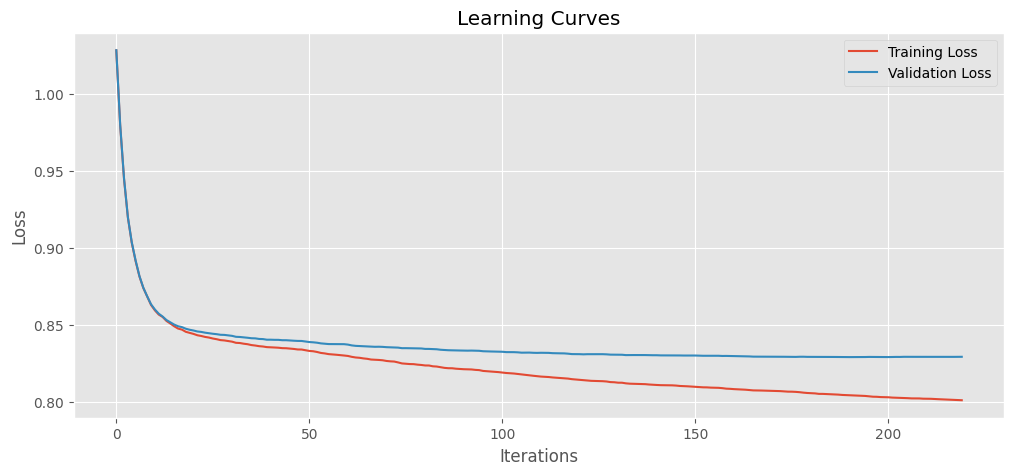

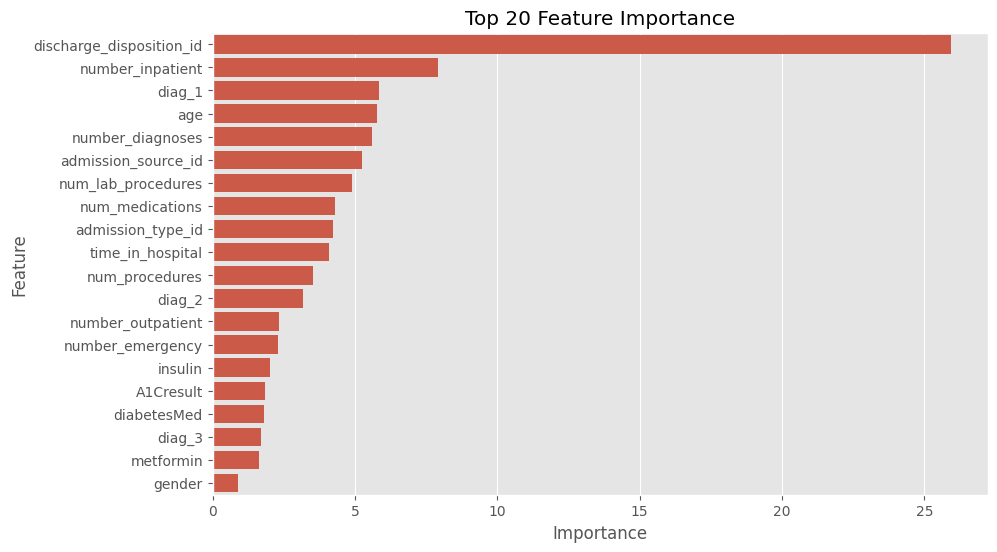

ValueError: continuous format is not supported

<Figure size 800x600 with 0 Axes>

In [37]:
# Initialize the evaluator
evaluator = ModelEvaluator(
    model=final_model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    cat_features=cat_features,
)

# Run all evaluations
evaluator.evaluate_all()
